In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("boston_housing.csv")

In [9]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Boston Housing Dataset - Column Descriptions

- **CRIM**: Per capita crime rate by town  
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft  
- **INDUS**: Proportion of non-retail business acres per town  
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
- **NOX**: Nitric oxide concentration (parts per 10 million)  
- **RM**: Average number of rooms per dwelling  
- **AGE**: Proportion of owner-occupied units built prior to 1940  
- **DIS**: Weighted distances to five Boston employment centers  
- **RAD**: Index of accessibility to radial highways  
- **TRATIO**: Pupil-teacher ratio by town  
- **B**: 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town  
- **LSTAT**: Percentage of lower status of the population  
- **MEDV**: Median value of owner-occupied homes in $1000s  


In [14]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [16]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: xlabel='medv', ylabel='Density'>

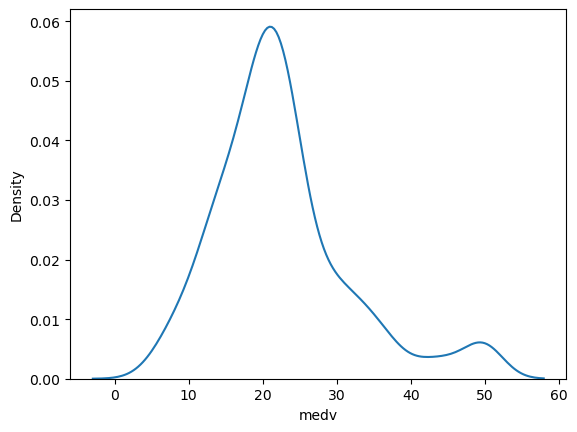

In [20]:
sns.kdeplot(data=df, x="medv")

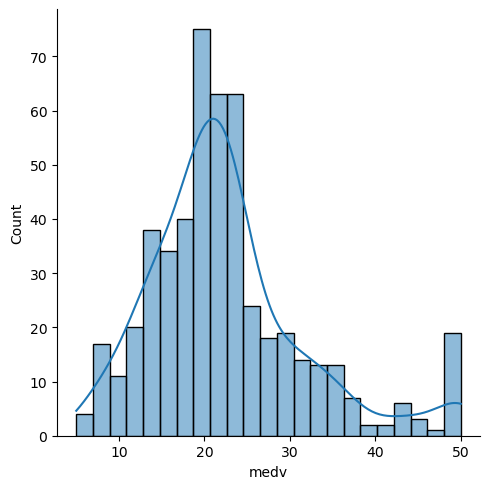

In [24]:
sns.displot(data=df["medv"], kde=True)

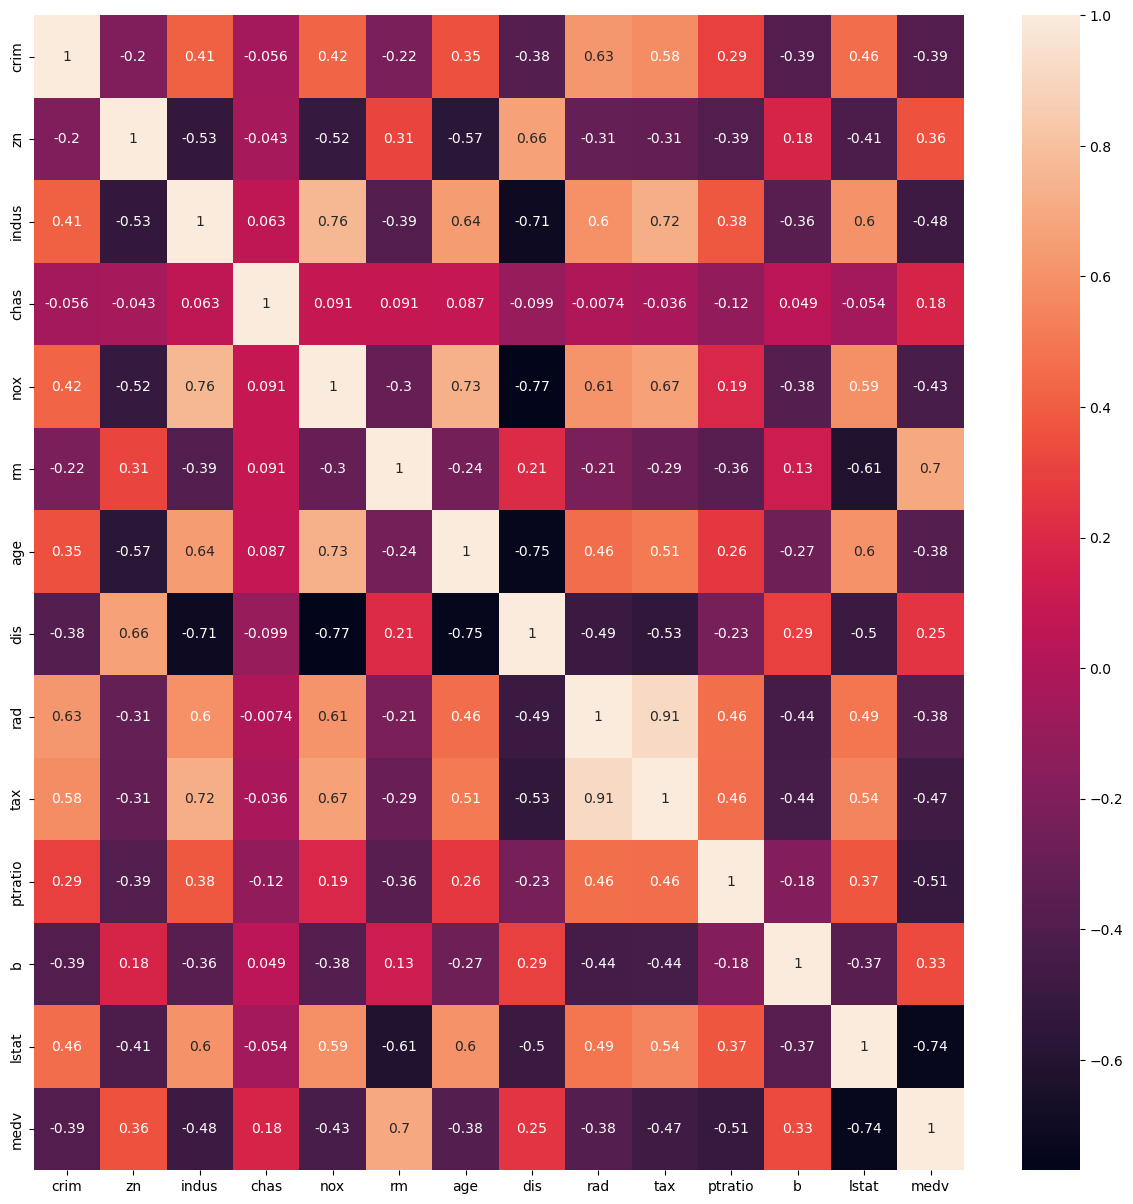

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

<Axes: >

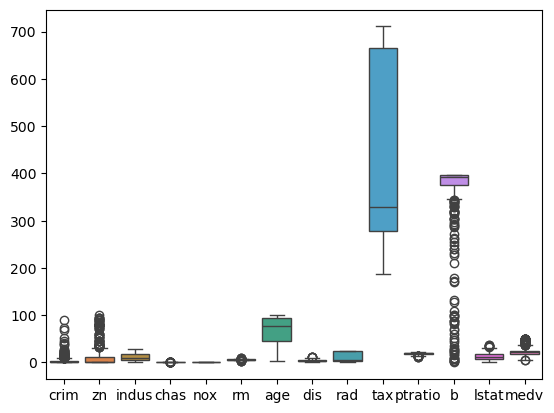

In [32]:
sns.boxplot(df)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = np.asarray(df.drop(columns=["medv"]))
y = np.asarray(df["medv"])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

model.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(x_test)

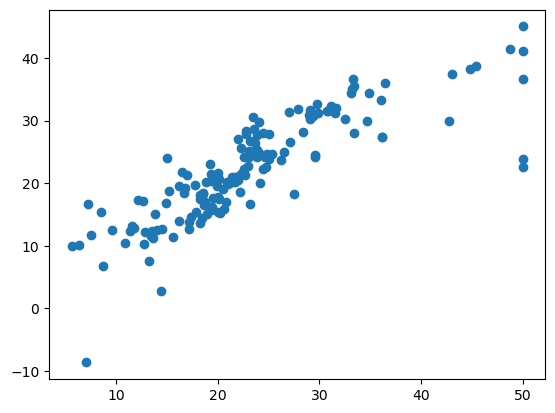

In [42]:
plt.scatter(y_test, y_pred)

In [56]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("r2: ", r2)
print("rmse: ", rmse)

r2:  0.6948038985015306
rmse:  5.137079113470769
